In [47]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale


In [48]:
data = "data/faithful.dat"
df = pd.read_csv(data, sep="\s+", skiprows=25)

In [49]:
print(df.shape)
print(df.info())
display(df.head())

(272, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 1 to 272
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eruptions  272 non-null    float64
 1   waiting    272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 6.4 KB
None


,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [50]:
df.reset_index(drop=True, inplace=True)
display(df.head())

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [51]:
X_scaled = scale(df)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))


[4.80008190e-16 4.40823848e-16]
[1. 1.]


In [52]:
print(type(X_scaled))
display(X_scaled[:5])

<class 'numpy.ndarray'>


array([[ 0.09849886,  0.59712344],
       [-1.48145856, -1.24518118],
       [-0.13586149,  0.22866251],
       [-1.05750332, -0.6556437 ],
       [ 0.91744345,  1.03927655]])

In [53]:
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)
display(df_scaled.head())

,eruptions,waiting
0,0.098499,0.597123
1,-1.481459,-1.245181
2,-0.135861,0.228663
3,-1.057503,-0.655644
4,0.917443,1.039277


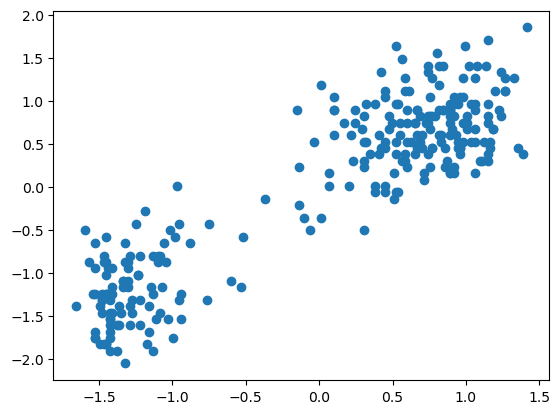

In [54]:
plt.scatter(df_scaled["eruptions"], df_scaled["waiting"], marker="o")

c:\Users\haseg\miniconda3\envs\ds2024\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\haseg\miniconda3\envs\ds2024\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\haseg\miniconda3\envs\ds2024\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\haseg\miniconda3\envs\ds2024\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarn

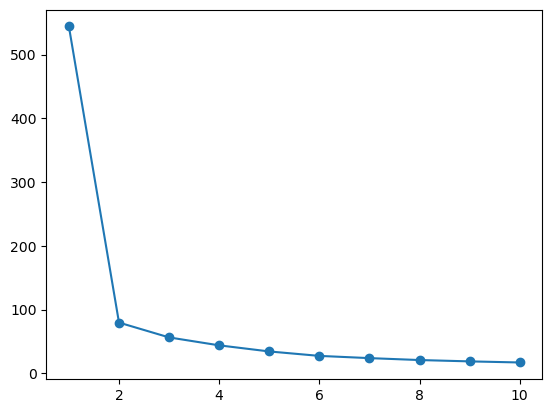

In [55]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10)
    km.fit(X_scaled)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker="o")

In [56]:
km = KMeans(n_clusters=2, n_init=10)
cls = km.fit_predict(X_scaled)
print(cls)

[0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0]


c:\Users\haseg\miniconda3\envs\ds2024\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [57]:
df["cluster_n"] = cls
display(df.head())

,eruptions,waiting,cluster_n
0,3.600,79,0
1,1.800,54,1
2,3.333,74,0
3,2.283,62,1
4,4.533,85,0


In [58]:
print(df["cluster_n"].value_counts())

cluster_n
0    174
1     98
Name: count, dtype: int64


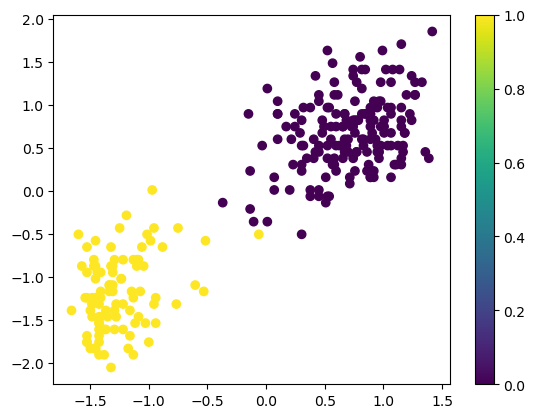

In [59]:
plt.scatter(df_scaled["eruptions"], df_scaled["waiting"], c=df["cluster_n"], marker="o")
plt.colorbar()

In [60]:
print(km.cluster_centers_)

[[ 0.70970327  0.67674488]
 [-1.26008539 -1.20156744]]
